In [1]:
#check the direction

In [2]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [4]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Work_with_MM")

# Verify the change
print(os.getcwd())


H:\Work_with_MM


In [6]:
import xarray as xr
import pandas as pd
import pandas as gpd
import regionmask
import numpy as np
import geopandas
import xarray as xr
import xarray as xr
import seaborn as sns
import rioxarray
from shapely.geometry import mapping
import netCDF4
import netCDF4 as nc
from PIL import Image
import os
from netCDF4 import Dataset
import geopandas as gpd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
#from xarrayMannKendall import MannKendall
import pymannkendall as mk
import xarray as xr
import numpy as np
from scipy.stats import kendalltau

In [7]:
# Test the data (data of January, February, March, April_2007)

Data_Dis = xr.open_dataset("All_data_2007_2008_2009\January_February_March_April_2007.nc")

In [8]:
Data_Dis

<xarray.Dataset> Size: 18MB
Dimensions:     (valid_time: 120, latitude: 93, longitude: 103)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 960B 2007-01-02 ... 2007-05-01
    surface     float64 8B ...
  * latitude    (latitude) float64 744B 33.98 33.93 33.88 ... 29.48 29.43 29.38
  * longitude   (longitude) float64 824B 46.08 46.12 46.17 ... 51.07 51.12 51.17
    rootZone    float64 8B ...
Data variables:
    rowe        (valid_time, latitude, longitude) float32 5MB ...
    sd          (valid_time, latitude, longitude) float32 5MB ...
    swir        (valid_time, latitude, longitude) float32 5MB ...
    dis24       (valid_time, latitude, longitude) float32 5MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-03T08:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:

import xarray as xr
import os

# Folder containing all NetCDF files
folder_path = "All_data_2007_2008_2009"
output_file = "Combined_Discharge_Data_2007_2009.nc"

# List of all files to combine (in chronological order)
file_list = [
    "January_February_March_April_2007.nc",
    "May_June_July_August_2007.nc",
    "September_October_November_December_2007.nc",
    "January_February_March_April_2008.nc",
    "May_June_July_August_2008.nc",
    "September_October_November_December_2008.nc",
    "January_February_March_April_2009.nc",
    "May_June_July_August_2009.nc",
    "September_October_November_December_2009.nc"
]

# Build full file paths
full_paths = [os.path.join(folder_path, f) for f in file_list]

# Open and concatenate all datasets along time dimension
datasets = []
for path in full_paths:
    ds = xr.open_dataset(path)
    datasets.append(ds)

# Combine datasets (ensure 'valid_time' is the dimension to concatenate along)
combined_ds = xr.concat(datasets, dim="valid_time")

# Optional: Sort by time to ensure chronological order
combined_ds = combined_ds.sortby("valid_time")

# Save to a single NetCDF file
combined_ds.to_netcdf(output_file, mode="w")

print(f"✅ Success! Combined dataset saved to: {output_file}")
print(f"Total time steps: {len(combined_ds.valid_time)} | Total size: {combined_ds.nbytes / 1e9:.2f} GB")



✅ Success! Combined dataset saved to: Combined_Discharge_Data_2007_2009.nc
Total time steps: 1096 | Total size: 0.17 GB


=== FULL DATASET INFO ===
<xarray.Dataset> Size: 168MB
Dimensions:     (valid_time: 1096, latitude: 93, longitude: 103)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 9kB 2007-01-02 ... 2010-01-01
    surface     float64 8B ...
  * latitude    (latitude) float64 744B 33.98 33.93 33.88 ... 29.48 29.43 29.38
  * longitude   (longitude) float64 824B 46.08 46.12 46.17 ... 51.07 51.12 51.17
    rootZone    float64 8B ...
Data variables:
    rowe        (valid_time, latitude, longitude) float32 42MB ...
    sd          (valid_time, latitude, longitude) float32 42MB ...
    swir        (valid_time, latitude, longitude) float32 42MB ...
    dis24       (valid_time, latitude, longitude) float32 42MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range 

c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


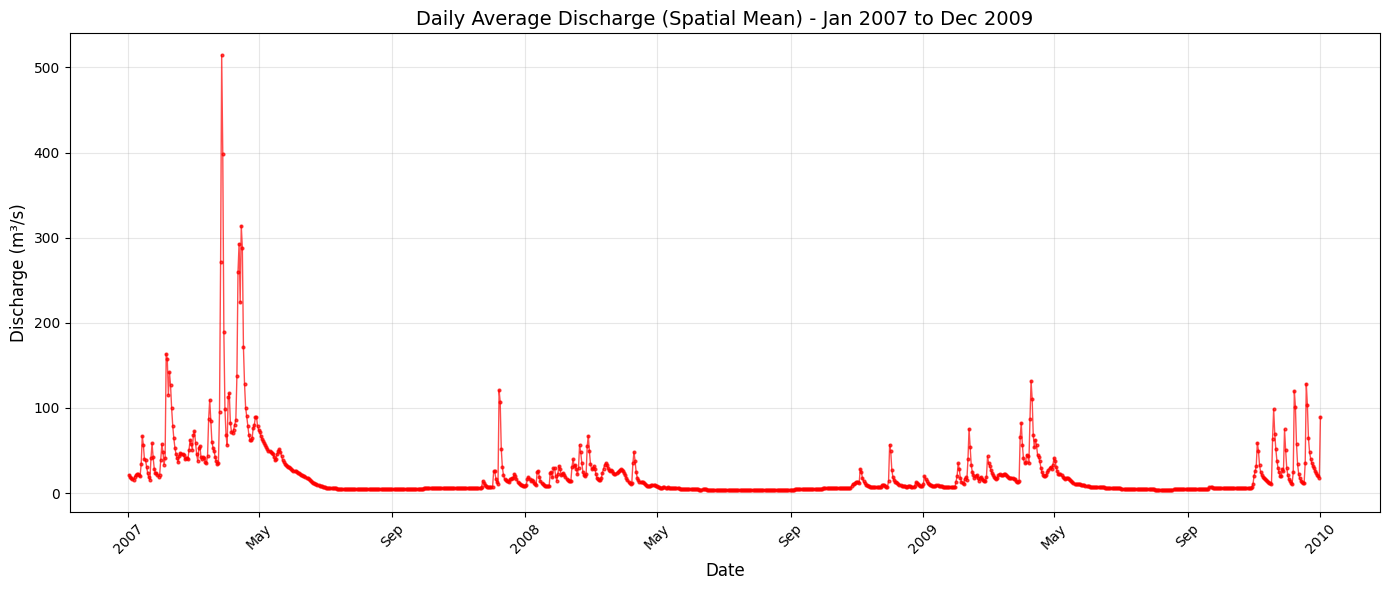

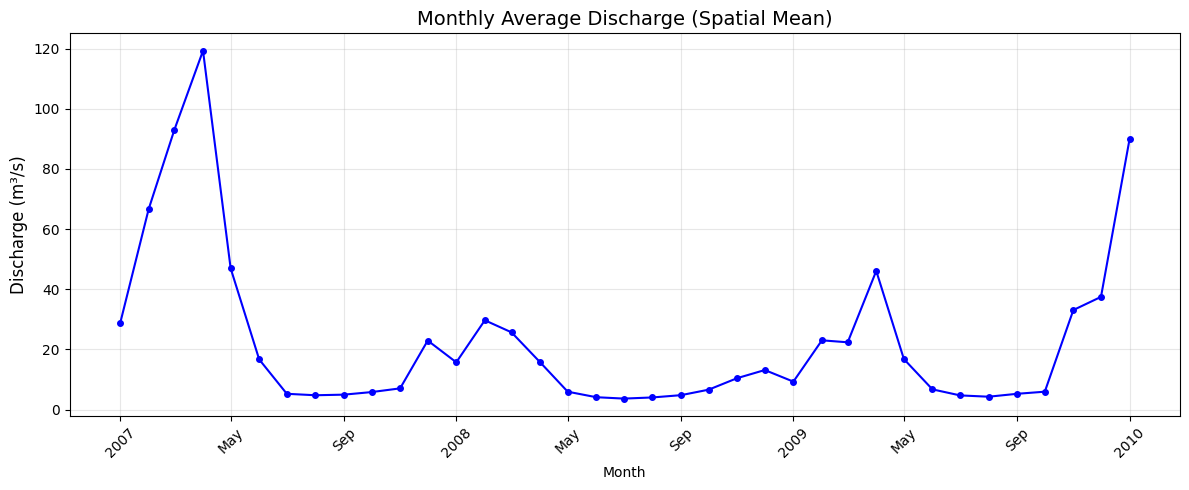


=== MONTHLY MEAN DISCHARGE (SPATIAL AVERAGE) ===
January 2007: 28.6664 m³/s
February 2007: 66.6662 m³/s
March 2007: 93.1081 m³/s
April 2007: 119.3218 m³/s
May 2007: 46.9716 m³/s
June 2007: 16.6729 m³/s
July 2007: 5.2465 m³/s
August 2007: 4.7620 m³/s
September 2007: 4.9634 m³/s
October 2007: 5.8172 m³/s
November 2007: 7.0498 m³/s
December 2007: 22.9455 m³/s
January 2008: 15.7167 m³/s
February 2008: 29.6916 m³/s
March 2008: 25.6758 m³/s
April 2008: 15.7451 m³/s
May 2008: 5.9456 m³/s
June 2008: 4.1118 m³/s
July 2008: 3.6522 m³/s
August 2008: 4.0337 m³/s
September 2008: 4.7922 m³/s
October 2008: 6.6147 m³/s
November 2008: 10.4514 m³/s
December 2008: 13.1466 m³/s
January 2009: 9.2902 m³/s
February 2009: 23.0271 m³/s
March 2009: 22.3690 m³/s
April 2009: 46.1039 m³/s
May 2009: 16.7931 m³/s
June 2009: 6.7208 m³/s
July 2009: 4.7136 m³/s
August 2009: 4.2785 m³/s
September 2009: 5.2482 m³/s
October 2009: 5.9451 m³/s
November 2009: 33.0998 m³/s
December 2009: 37.4728 m³/s
January 2010: 89.8647 m³

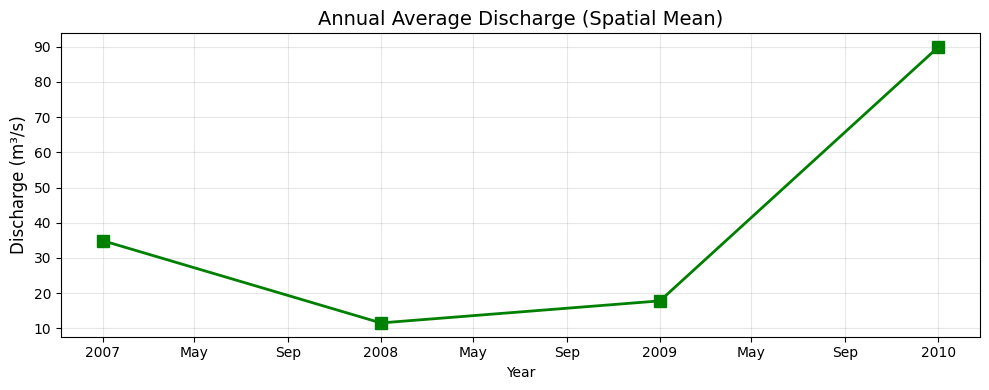


=== ANNUAL MEAN DISCHARGE (SPATIAL AVERAGE) ===
2007: 34.9210 m³/s
2008: 11.5640 m³/s
2009: 17.8265 m³/s
2010: 89.8647 m³/s


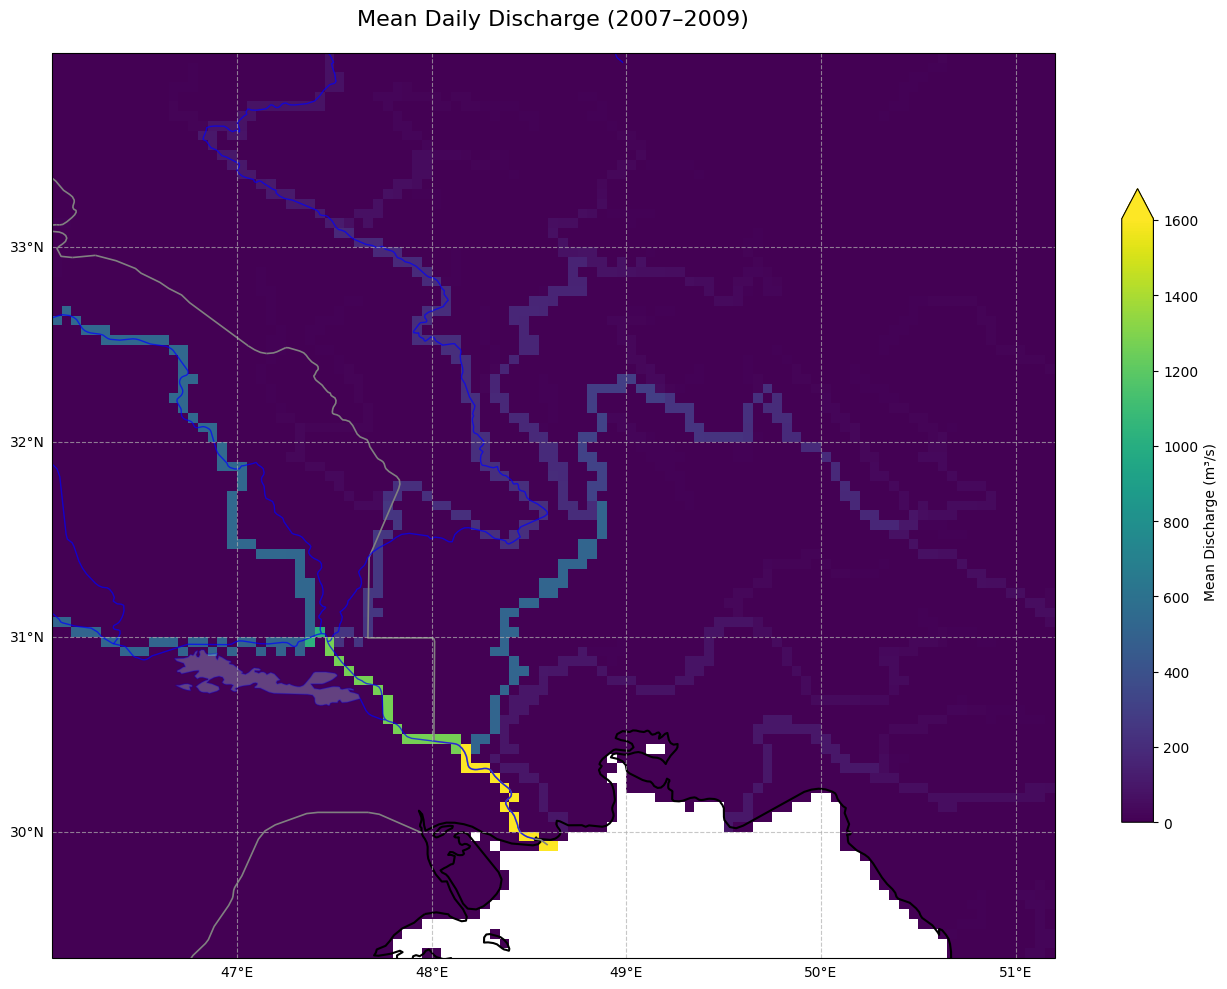

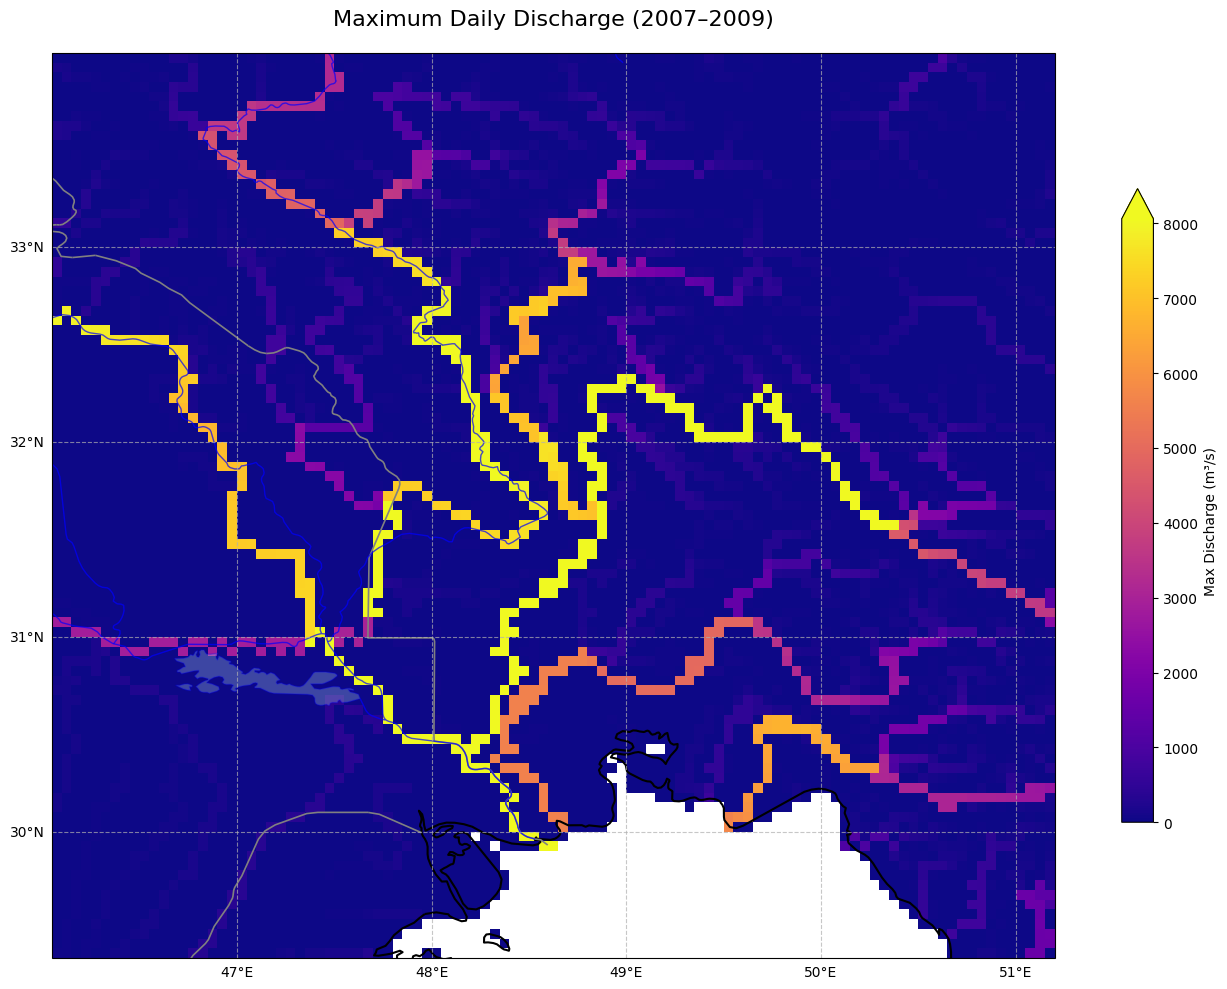

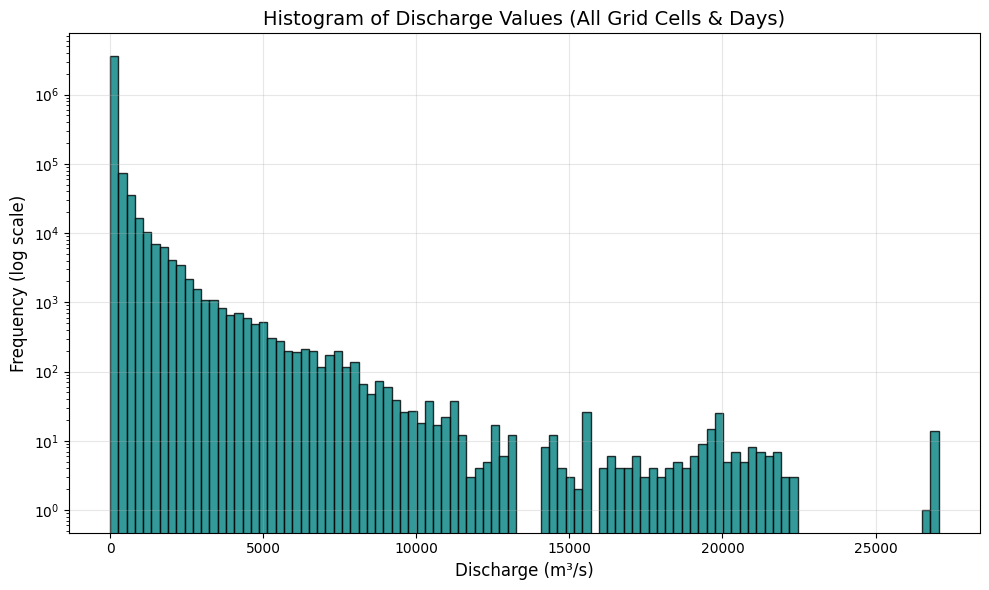


✅ All plots generated successfully! Check your working directory.


In [15]:
# -*- coding: utf-8 -*-
"""
Corrected Analysis of Combined Discharge Data (2007–2009)
- Fixed spatial maps
- Added annual time series
- Handled NaN values
"""

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ================== 1. Load Dataset ==================
file_path = r"Combined_Discharge_Data_2007_2009.nc"
Data_Dis = xr.open_dataset(file_path)

# Print full dataset information
print("=== FULL DATASET INFO ===")
print(Data_Dis)

# Select discharge variable and handle NaN values
dis = Data_Dis['dis24']  # Shape: (valid_time: 1096, latitude: 93, longitude: 103)

# Fill NaN with 0 (if appropriate for discharge) or use .dropna()
# dis = dis.fillna(0)  # Uncomment if NaNs should be treated as 0
print(f"\nSelected variable 'dis24' with shape: {dis.shape}")

# ================== 2. Basic Statistics (Handling NaNs) ==================
print("\n=== BASIC STATISTICS FOR 'dis24' (NaN HANDLED) ===")
# Calculate stats ignoring NaN
valid_dis = dis.where(dis > 0)  # Or use .dropna() but that removes spatial points

print(f"Mean discharge: {valid_dis.mean().item():.4f} m³/s")
print(f"Median discharge: {np.nanmedian(valid_dis.values):.4f} m³/s")  # Use nanmedian
print(f"Min discharge: {valid_dis.min().item():.4f} m³/s")
print(f"Max discharge: {valid_dis.max().item():.4f} m³/s")
print(f"Standard deviation: {valid_dis.std().item():.4f} m³/s")

# Spatial statistics (ignore NaN)
dis_mean_spatial = dis.mean(dim='valid_time')
dis_max_spatial = dis.max(dim='valid_time')
dis_std_spatial = dis.std(dim='valid_time')

# ================== 3. Daily Time Series (Spatial Average) ==================
plt.figure(figsize=(14, 6))
dis_daily_avg = dis.mean(dim=['latitude', 'longitude'])
dis_daily_avg.plot.line('r-', marker='o', markersize=2, linewidth=1, alpha=0.7)
plt.title('Daily Average Discharge (Spatial Mean) - Jan 2007 to Dec 2009', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== 4. Monthly Mean Time Series ==================
dis_monthly = dis.resample(valid_time='MS').mean()  # MS: Month Start
dis_monthly_avg = dis_monthly.mean(dim=['latitude', 'longitude'])

plt.figure(figsize=(12, 5))
dis_monthly_avg.plot.line('b-o', markersize=4, linewidth=1.5)
plt.title('Monthly Average Discharge (Spatial Mean)', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print monthly values
print("\n=== MONTHLY MEAN DISCHARGE (SPATIAL AVERAGE) ===")
for time, value in zip(dis_monthly_avg.valid_time.values, dis_monthly_avg.values):
    month_name = pd.to_datetime(time).strftime('%B %Y')
    print(f"{month_name}: {value:.4f} m³/s")

# ================== 5. Annual Mean Time Series ==================
dis_annual = dis.resample(valid_time='YS').mean()  # YS: Year Start
dis_annual_avg = dis_annual.mean(dim=['latitude', 'longitude'])

plt.figure(figsize=(10, 4))
dis_annual_avg.plot.line('g-s', markersize=8, linewidth=2)
plt.title('Annual Average Discharge (Spatial Mean)', fontsize=14)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print annual values
print("\n=== ANNUAL MEAN DISCHARGE (SPATIAL AVERAGE) ===")
for time, value in zip(dis_annual_avg.valid_time.values, dis_annual_avg.values):
    year = pd.to_datetime(time).strftime('%Y')
    print(f"{year}: {value:.4f} m³/s")

# ================== 6. Spatial Map: Mean Discharge (Fixed!) ==================
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot mean discharge with proper NaN handling
cs = dis_mean_spatial.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    cbar_kwargs={'label': 'Mean Discharge (m³/s)', 'shrink': 0.7},
    robust=True,
    vmin=0,  # Discharge can't be negative
    vmax=dis_mean_spatial.max().item() * 0.9  # Cap at 90% of max for better contrast
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1.5, color='black')
ax.add_feature(cfeature.BORDERS, linewidth=1.2, edgecolor='gray')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=1, alpha=0.7)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue', alpha=0.3)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False

plt.title("Mean Daily Discharge (2007–2009)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# ================== 7. Spatial Map: Maximum Discharge ==================
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

cs = dis_max_spatial.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='plasma',
    cbar_kwargs={'label': 'Max Discharge (m³/s)', 'shrink': 0.7},
    robust=True,
    vmin=0
)

ax.coastlines(resolution='10m', linewidth=1.5, color='black')
ax.add_feature(cfeature.BORDERS, linewidth=1.2, edgecolor='gray')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=1, alpha=0.7)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue', alpha=0.3)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
gl.top_labels = False
gl.right_labels = False

plt.title("Maximum Daily Discharge (2007–2009)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# ================== 8. Histogram of All Discharge Values ==================
plt.figure(figsize=(10, 6))
dis_flattened = dis.stack(spatial=('latitude', 'longitude')).dropna('spatial')
values = dis_flattened.values[dis_flattened.values > 0]  # Ignore zeros/NaNs

plt.hist(values, bins=100, color='teal', edgecolor='black', alpha=0.8, log=True)  # Log scale for better visibility
plt.xlabel('Discharge (m³/s)', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.title('Histogram of Discharge Values (All Grid Cells & Days)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ All plots generated successfully! Check your working directory.")

=== DATASET SUMMARY ===
Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 1096, 'latitude': 93, 'longitude': 103})
Variables: ['rowe', 'sd', 'swir', 'dis24']
Time range: 2007-01-02T00:00:00.000000000 to 2010-01-01T00:00:00.000000000

=== KEY STATISTICS ===
Overall mean: 21.48 m³/s
Max discharge: 27059.34 m³/s
Min discharge: 0.00 m³/s
Std deviation: 217.99 m³/s


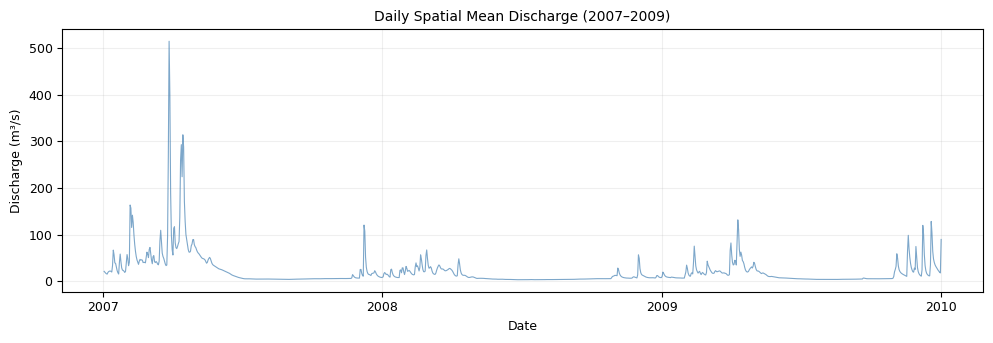

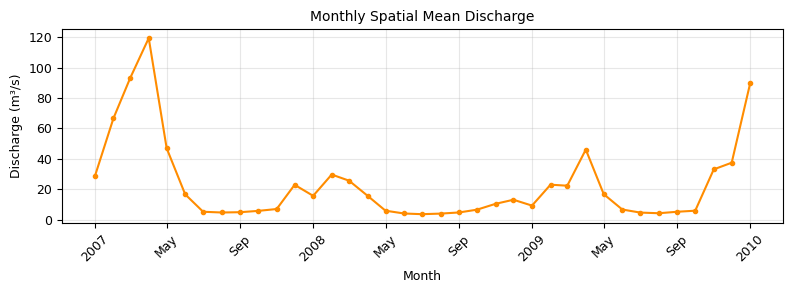

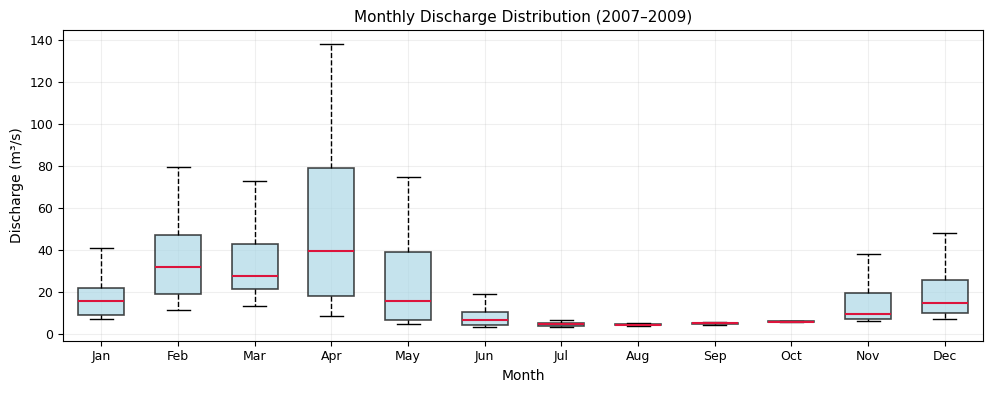

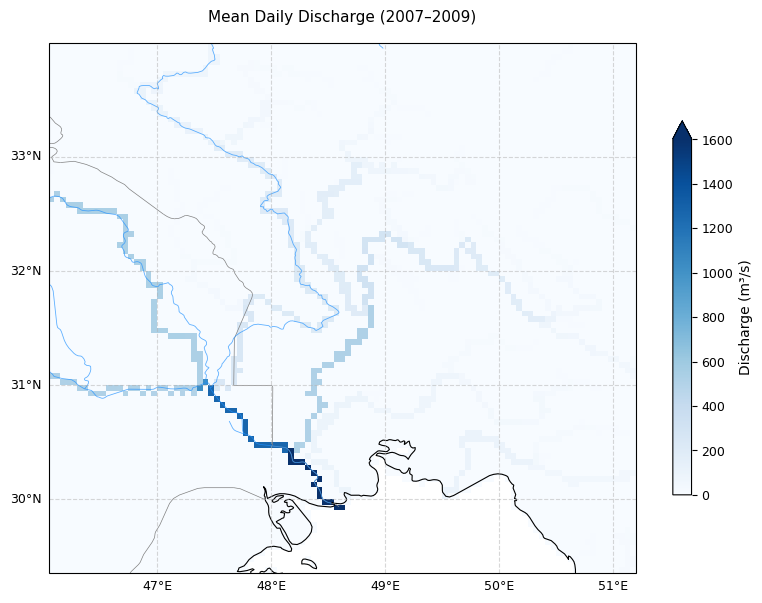

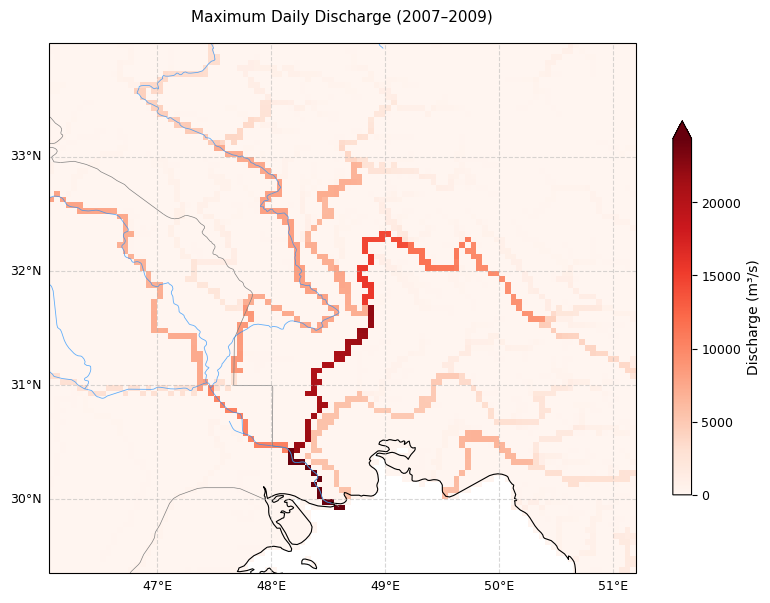


✅ Professional visualizations generated with optimized layouts!


In [17]:
# -*- coding: utf-8 -*-
"""
Enhanced Professional Analysis of Combined Discharge Data (2007–2009)
- Fixed box plot implementation
- Smaller figures with optimized layouts
- Professional font scaling
"""

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter

# Set global font sizes for consistency
SMALL_SIZE = 9
MEDIUM_SIZE = 10
LARGE_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # Controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # Font size of axes titles
plt.rc('axes', labelsize=MEDIUM_SIZE)     # Font size of axis labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # Font size of tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # Legend font size
plt.rc('figure', titlesize=LARGE_SIZE)    # Figure title size

# ================== 1. Load Dataset ==================
file_path = r"Combined_Discharge_Data_2007_2009.nc"
Data_Dis = xr.open_dataset(file_path)

# Print full dataset information (minimalist)
print("=== DATASET SUMMARY ===")
print(f"Dimensions: {Data_Dis.dims}")
print(f"Variables: {list(Data_Dis.data_vars)}")
print(f"Time range: {Data_Dis.valid_time.min().values} to {Data_Dis.valid_time.max().values}")

# Select discharge variable
dis = Data_Dis['dis24']  # Shape: (1096, 93, 103)

# ================== 2. Basic Statistics (Cleaned) ==================
print("\n=== KEY STATISTICS ===")
print(f"Overall mean: {dis.mean().item():.2f} m³/s")
print(f"Max discharge: {dis.max().item():.2f} m³/s")
print(f"Min discharge: {dis.min().item():.2f} m³/s")
print(f"Std deviation: {dis.std().item():.2f} m³/s")

# ================== 3. Daily Time Series (Compact) ==================
plt.figure(figsize=(10, 3.5))  # Smaller figure
dis_daily_avg = dis.mean(dim=['latitude', 'longitude'])
dis_daily_avg.plot.line('steelblue', linewidth=0.8, alpha=0.7)
plt.title('Daily Spatial Mean Discharge (2007–2009)', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Date', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.2)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# ================== 4. Monthly Mean Time Series (Compact) ==================
plt.figure(figsize=(8, 3))  # Smaller figure
dis_monthly_avg = dis.resample(valid_time='MS').mean().mean(dim=['latitude', 'longitude'])
dis_monthly_avg.plot.line('darkorange', marker='o', markersize=3, linewidth=1.5)
plt.title('Monthly Spatial Mean Discharge', fontsize=MEDIUM_SIZE)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE-1)
plt.xlabel('Month', fontsize=MEDIUM_SIZE-1)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================== 5. BOX PLOTS: Monthly Discharge Distribution (FIXED!) ==================
# Prepare data: Convert to DataFrame and group by month
daily_spatial_mean = dis.mean(dim=['latitude', 'longitude']).to_dataframe(name='discharge')
daily_spatial_mean['month'] = daily_spatial_mean.index.month

# Create a list of discharge values for each month
monthly_data = []
for month in range(1, 13):
    month_vals = daily_spatial_mean[daily_spatial_mean['month'] == month]['discharge'].dropna()
    monthly_data.append(month_vals)

# Create professional box plot with matplotlib
plt.figure(figsize=(10, 4))
box_plot = plt.boxplot(
    monthly_data,
    positions=range(1, 13),
    showfliers=False,  # Omit extreme outliers
    patch_artist=True,
    boxprops=dict(linewidth=1.2, facecolor='lightblue', alpha=0.7),
    medianprops=dict(linewidth=1.5, color='crimson'),
    whiskerprops=dict(linewidth=1, linestyle='--'),
    capprops=dict(linewidth=1, color='black'),
    widths=0.6
)

plt.title('Monthly Discharge Distribution (2007–2009)', fontsize=LARGE_SIZE-1)
plt.ylabel('Discharge (m³/s)', fontsize=MEDIUM_SIZE)
plt.xlabel('Month', fontsize=MEDIUM_SIZE)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# ================== 6. Spatial Maps (Compact Layout) ==================
def plot_spatial_map(data, title, cmap='viridis', vmin=None, vmax=None):
    plt.figure(figsize=(8, 6))  # Smaller map size
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    if vmin is None:
        vmin = data.min().item() * 0.9
    if vmax is None:
        vmax = data.max().item() * 0.9
    
    cs = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        cbar_kwargs={'label': 'Discharge (m³/s)', 'shrink': 0.7},
        vmin=vmin,
        vmax=vmax,
        add_colorbar=True
    )
    
    ax.coastlines(resolution='10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth=0.6, alpha=0.7)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    plt.title(title, fontsize=MEDIUM_SIZE+1, pad=15)
    plt.tight_layout()
    plt.show()

# Mean discharge map
plot_spatial_map(
    dis.mean(dim='valid_time'),
    "Mean Daily Discharge (2007–2009)",
    cmap='Blues',
    vmin=0
)

# Max discharge map
plot_spatial_map(
    dis.max(dim='valid_time'),
    "Maximum Daily Discharge (2007–2009)",
    cmap='Reds',
    vmin=0
)

print("\n✅ Professional visualizations generated with optimized layouts!")